<a href="https://colab.research.google.com/github/Tasmina0609/NetworkAlgo/blob/master/NetworkGraph_PW2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to Graph Theory** 

###**Requirements**

In [0]:
""" Please choose the file "cities_in_az.csv" and "airports.csv" to use the code """
from google.colab import files
uploaded = files.upload()

Saving cities_in_az.csv to cities_in_az.csv
Saving airports.csv to airports.csv


In [0]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# **Just playing with *networkx***

In [0]:
data=pd.read_csv('cities_in_az.csv')
print(data.head())
print(data.columns)

    Origin  Destiny  Hours
0     Alat     Baku   1.08
1     Baku     Alat   1.13
2     Alat  Shirvan   0.83
3  Shirvan     Alat   0.80
4  Imishli  Shirvan   1.42
Index(['Origin', 'Destiny', 'Hours'], dtype='object')


In [0]:
G = nx.from_pandas_edgelist(data, source='Origin', target='Destiny', edge_attr=True)

In [0]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 7
Number of edges: 9
Average degree:   2.5714


In [0]:
G.nodes()

NodeView(('Alat', 'Baku', 'Shirvan', 'Imishli', 'Shamakhi', 'Kurdamir', 'Goychay'))

In [0]:
G.edges()

EdgeView([('Alat', 'Baku'), ('Alat', 'Shirvan'), ('Baku', 'Shamakhi'), ('Shirvan', 'Imishli'), ('Shirvan', 'Shamakhi'), ('Shirvan', 'Kurdamir'), ('Imishli', 'Shamakhi'), ('Shamakhi', 'Goychay'), ('Kurdamir', 'Goychay')])

In [0]:
list1 = list(G.neighbors("Baku"))
print(list1)

['Alat', 'Shamakhi']


In [0]:
paths = nx.all_simple_paths(G, source='Shirvan', target='Baku', cutoff=2)
print(list(paths))

[['Shirvan', 'Alat', 'Baku'], ['Shirvan', 'Shamakhi', 'Baku']]


# **Algorithms to find the path between two nodes**

In [0]:
def CreateDictionary(G,attr): 
    list_of_nodes=G.nodes()
    graph={}
    for node in list_of_nodes:
        list_of_neighbours=list(G.neighbors(node))
        dictionary={}
        for n in list_of_neighbours:
           dictionary[n]=G.edges[node,n][str(attr)]
        graph[node]=dictionary      
    return graph

In [0]:
graph_city=CreateDictionary(Gcity,'Hours')
print(graph_city)

{'Alat': {'Baku': 1.13, 'Shirvan': 0.8}, 'Baku': {'Alat': 1.13, 'Shamakhi': 1.77}, 'Shirvan': {'Alat': 0.8, 'Imishli': 1.38, 'Shamakhi': 1.47, 'Kurdamir': 1.2}, 'Imishli': {'Shirvan': 1.38, 'Shamakhi': 1.87}, 'Shamakhi': {'Imishli': 1.87, 'Baku': 1.77, 'Shirvan': 1.47, 'Goychay': 1.42}, 'Kurdamir': {'Shirvan': 1.2, 'Goychay': 0.97}, 'Goychay': {'Kurdamir': 0.97, 'Shamakhi': 1.42}}


In [0]:
def my_short_path(graph,src,dest,visited=[],distances={},predecessors={}): 
    # a few sanity checks
    if src not in graph:
        raise TypeError('The root of the shortest path tree cannot be found')
    if dest not in graph:
        raise TypeError('The target of the shortest path cannot be found')    
    
    if src == dest:
        # building the shortest path and display it
        path=[]
        pred=dest
        while pred != None:
            path.append(pred)
            pred=predecessors.get(pred,None)
        # reverses the array, to display the path nicely
        readable=path[0]
        for index in range(1,len(path)): readable = path[index]+' ->  '+readable
        #prints it 
        # print('Shortest path: '+str(path))
        print("Path: "+readable+"\nCost="+str(distances[dest]))     

    else :     
        # if it is the initial  run, initializes the cost
        if not visited: 
            distances[src]=0
        # visit the neighbors
        for neighbor in graph[src] :
            if neighbor not in visited:
                new_distance = distances[src] + graph[src][neighbor]
                if new_distance < distances.get(neighbor,float('inf')):
                    distances[neighbor] = new_distance
                    predecessors[neighbor] = src
        # mark as visited
        visited.append(src)
        # now that all neighbors have been visited: recurse                         
        # select the non visited node with lowest distance 'x'
        # run Dijskstra with src='x'
        unvisited={}
        for k in graph:
            if k not in visited:
                unvisited[k] = distances.get(k,float('inf'))        
        x=min(unvisited, key=unvisited.get)
        my_short_path(graph,x,dest,visited,distances,predecessors)


#**Cities**

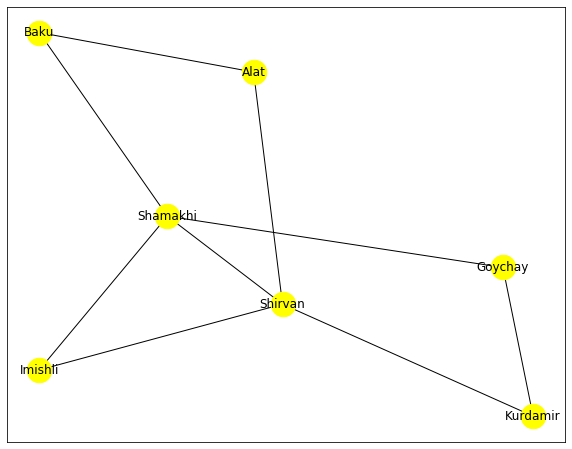

False


In [0]:
filename='cities_in_az.csv'
data=pd.read_csv(filename)
Gcity = nx.from_pandas_edgelist(data, source='Origin', target='Destiny', edge_attr=True)
fig=plt.figure(figsize=(10,8))
nx.draw_networkx(Gcity, with_labels=True,node_color='yellow',node_size=600,font_size=12)
nx.circular_layout(Gcity)
fig.savefig('city.png')
plt.show()

In [0]:
print("*** @author: parsha *** \n")
graph_city=CreateDictionary(Gcity,'Hours')
# print(graph_city)

src=input("Please enter the starting point:")
dest=input("Please enter destination: ")

c= my_short_path(graph_city,src,dest)
print(c)

*** @author: parsha *** 

Please enter the starting point:Alat
Please enter destination: Baku
Shortest path: ['Baku', 'Alat']
Path: Alat ->  Baku
Cost=1.13
None


# **Airports**

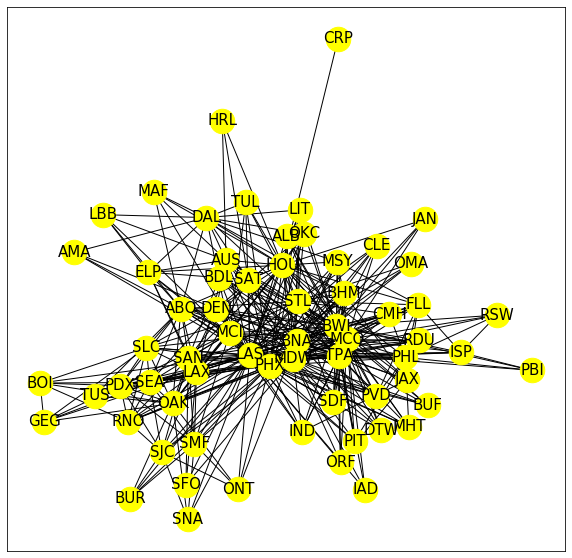

In [0]:
filename='airports.csv'
data=pd.read_csv(filename)
Gair = nx.from_pandas_edgelist(data, source='Origin', target='Dest', edge_attr=True)
fig=plt.figure(figsize=(10,10))
nx.draw_networkx(Gair, with_labels=True,node_color='yellow',node_size=600,font_size=15)
fig.savefig('airport.png')
plt.show()

In [0]:
print("*** @author: parsha ***\n")
graph_air=CreateDictionary(Gair,'AirTime')

print("Path from node RSW to OMA")
a= my_short_path(graph_air,'RSW','OMA')
print(a)

*** @author: parsha ***

Path from node RSW to OMA
Shortest path: ['OMA', 'STL', 'MCO', 'RSW']
Path: RSW ->  MCO ->  STL ->  OMA
Cost=209.0
None


#**PW no. 2**

In [0]:
def my_short_path(graph,src,dest,visited=[],distances={},predecessors={}): 
    # a few sanity checks
    if src not in graph:
        raise TypeError('The root of the shortest path tree cannot be found')
    if dest not in graph:
        raise TypeError('The target of the shortest path cannot be found')    
    
    if src == dest:
        # building the shortest path and display it
        path=[]
        pred=dest
        while pred != None:
            path.append(pred)
            pred=predecessors.get(pred,None)
        # reverses the array, to display the path nicely
        readable=path[0]
        for index in range(1,len(path)): readable = path[index]+' ->  '+readable
        #prints it 
        # print('Shortest path: '+str(path))
        print("Path: "+readable+"\nCost="+str(distances[dest]))     

    else :     
        # if it is the initial  run, initializes the cost
        if not visited: 
            distances[src]=0
        # visit the neighbors
        for neighbor in graph[src] :
            if neighbor not in visited:
                new_distance = distances[src] + graph[src][neighbor]
                if new_distance < distances.get(neighbor,float('inf')):
                    distances[neighbor] = new_distance
                    predecessors[neighbor] = src
        # mark as visited
        visited.append(src)
        # now that all neighbors have been visited: recurse                         
        # select the non visited node with lowest distance 'x'
        # run Dijskstra with src='x'
        unvisited={}
        for k in graph:
            if k not in visited:
                unvisited[k] = distances.get(k,float('inf'))        
        x=min(unvisited, key=unvisited.get)
        my_short_path(graph,x,dest,visited,distances,predecessors)


In [0]:
"""" 
    Apply shortest path method 
    to retrieve the path 
    without weights.
 """
def bfs_shortest_path(graph, start, goal):
    # keep track of explored nodes
    explored = []
    # keep track of all the paths to be checked
    queue = [[start]]
 
    # return path if start is goal
    if start == goal:
        return "That was easy! Start = goal"
 
    # keeps looping until all possible paths have been checked
    while queue:
        # pop the first path from the queue
        path = queue.pop(0)
        # get the last node from the path
        node = path[-1]
        if node not in explored:
            neighbours = graph[node]
            # go through all neighbour nodes, construct a new path and
            # push it into the queue
            for neighbour in neighbours:
                new_path = list(path)
                new_path.append(neighbour)
                queue.append(new_path)
                # return path if neighbour is goal
                if neighbour == goal:
                    return new_path
 
            # mark node as explored
            explored.append(node)
 
    # in case there's no path between the 2 nodes
    return "So sorry, but a connecting path doesn't exist :("

##**Cities**

In [0]:
filename='cities_in_az.csv'
data = pd.read_csv(filename)
G = nx.from_pandas_edgelist(data,source='Origin', target='Destiny', edge_attr=True ,create_using=nx.DiGraph) # NEW
print(nx.shortest_path(G, source='Baku', target='Imishli',weight='Hours'))

print(nx.is_directed(G))

['Baku', 'Alat', 'Shirvan', 'Imishli']
True


In [0]:
for i in list(G.nodes):
    print(G.nodes," ",G.degree(i)," ",G.in_degree(i)," ",G.out_degree(i))
    
# print(G.degree('Baku'))
# print(G.in_degree('Baku'))
# print(G.out_degree('Baku'))


['Alat', 'Baku', 'Shirvan', 'Imishli', 'Shamakhi', 'Kurdamir', 'Goychay']   4   2   2
['Alat', 'Baku', 'Shirvan', 'Imishli', 'Shamakhi', 'Kurdamir', 'Goychay']   4   2   2
['Alat', 'Baku', 'Shirvan', 'Imishli', 'Shamakhi', 'Kurdamir', 'Goychay']   8   4   4
['Alat', 'Baku', 'Shirvan', 'Imishli', 'Shamakhi', 'Kurdamir', 'Goychay']   4   2   2
['Alat', 'Baku', 'Shirvan', 'Imishli', 'Shamakhi', 'Kurdamir', 'Goychay']   8   4   4
['Alat', 'Baku', 'Shirvan', 'Imishli', 'Shamakhi', 'Kurdamir', 'Goychay']   4   2   2
['Alat', 'Baku', 'Shirvan', 'Imishli', 'Shamakhi', 'Kurdamir', 'Goychay']   4   2   2


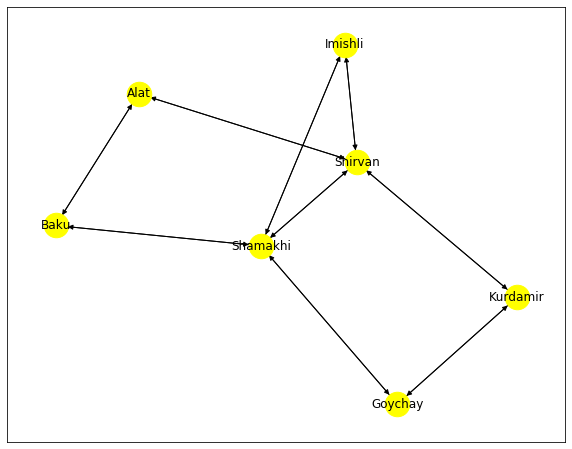

In [0]:
""" Plotting the graph to visualise it """
fig=plt.figure(figsize=(10,8))
nx.draw_networkx(G, with_labels=True,node_color='yellow',node_size=600,font_size=12)
nx.circular_layout(G)
plt.show()

In [0]:
""" Apply shortest path method to retrieve the path 
    with attribute ’Hours’ as the weight. """
print("*** @author: parsha *** \n")

graph_city=CreateDictionary(G,'Hours')
# print(graph_city)

print("----With weights----")
my_short_path(graph_city,'Baku','Imishli')
print("\n----Without weights----")
bfs_shortest_path(graph_city,'Baku','Imishli')

*** @author: parsha *** 

----With weights----
Path: Baku ->  Alat ->  Shirvan ->  Imishli
Cost=3.34

----Without weights----


['Baku', 'Shamakhi', 'Imishli']

##**Airports**

In [0]:
filename='airports.csv'
data = pd.read_csv(filename)
G = nx.from_pandas_edgelist(data,source='Origin', target='Dest', edge_attr=True ,create_using=nx.DiGraph) # NEW
# print(nx.shortest_path(G, source='RSW', target='Imishli',weight='Hours'))

print(nx.is_directed(G))

True


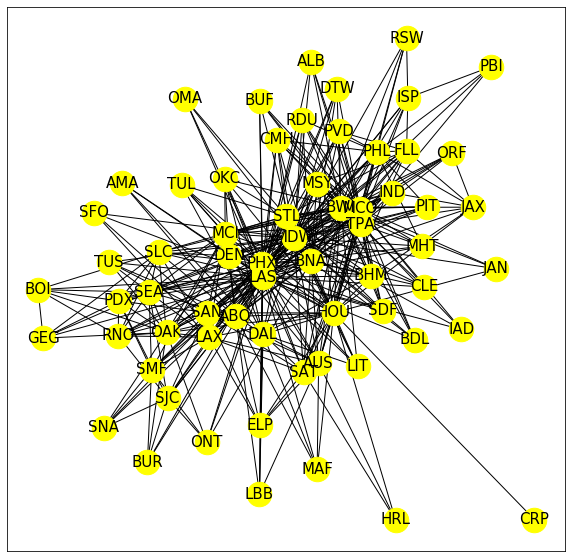

In [0]:
""" Plotting the graph to visualise it """
fig=plt.figure(figsize=(10,10))
nx.draw_networkx(Gair, with_labels=True,node_color='yellow',node_size=600,font_size=15)
fig.savefig('airport.png')
plt.show()

In [0]:
""" Apply shortest path method to retrieve the path 
    with attribute ’AirTime’ as the weight. """

print("*** @author: parsha ***\n")


print("\n----With respect to the distance----")
graph_air=CreateDictionary(Gair,'Distance')
print("Path from node ’CRP’ to ’BOI’")
my_short_path(graph_air,'CRP','BOI')

print("\n----With respect to the time----")
graph_air=CreateDictionary(Gair,'AirTime')
bfs_shortest_path(graph_air,'CRP','BOI')

*** @author: parsha ***


----With respect to the distance----
Path from node ’CRP’ to ’BOI’
Path: CRP ->  HOU ->  ABQ ->  SLC ->  BOI
Cost=1730

----With respect to the time----


['CRP', 'HOU', 'LAS', 'BOI']